<a href="https://colab.research.google.com/github/AndreyDyachkov/Data_analytics_with_Python/blob/main/04_video_game_sales_analysis/4_Data_cleaning_EDA_hypotheses_testing(Yandex_Practicum_eng).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining the main features of best-selling video games (Data cleaning, EDA, hypotheses testing)

<b>Task:</b>
Identify the features that determine the success of video games using open-source data (game sales, user and expert ratings, genres and platforms), choose the most popular products and targets for an advertising campaign.
<br>
<b>Data description: </b>
a csv file; data since 2016; columns:
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales — sales in North America (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score (max 100)
- User_Score (max 10)
- Rating — ESRB (Entertainment Software Rating Board) rating


### Getting data

#### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Data processing

#### Converting column names to lower case

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Checking for duplicates and missing values. Converting data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are missing values. Let's look at the percentage.

In [6]:
df.isnull().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Checking for duplicates

In [7]:
df.duplicated().sum()

0

<b>Results:</b><br>
There is a large percentage of missing values in the last three columns, there are no duplicates, the data type does not always match the data in the columns. 
<br>By column:<br>
- Name - 2 values are missing. We will look at the data and probably remove these rows.
- Platform - looks good
- Year_of_Release  - 2% of entries are missing. We will look at the data and possibly remove these rows.
- Genre - 2 values are missing. We can fill them with mode or leave them as it is.
- NA_sales, EU_sales, JP_sales, Other_sales — look good.
- Critic_Score - more than 50% of the values ​​are missing and we cannot fill in them. The float type is OK.
- User_Score  - 40% of entries are missing. We will leave it as it is, but convert the data type from string to float.  
- Rating — 40% of values are missing - let's leave it as it is.

##### name

Missing values:

In [8]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are no genres, scores, or ratings either. Let's remove these rows.

In [9]:
df = df[~df['name'].isnull()]
len(df)

16713

##### year_of_release

Let's look at the rows with missing years

In [10]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Some games have a year in their names. So it might be possible to fill in the year of release based on the name column. Let's retrieve a list of names.

In [11]:
df[df['year_of_release'].isnull()]['name'].values.tolist()

['Madden NFL 2004',
 'FIFA Soccer 2004',
 'LEGO Batman: The Videogame',
 'wwe Smackdown vs. Raw 2006',
 'Space Invaders',
 'Rock Band',
 "Frogger's Adventures: Temple of the Frog",
 'LEGO Indiana Jones: The Original Adventures',
 'Call of Duty 3',
 'Rock Band',
 'Call of Duty: Black Ops',
 'Rock Band',
 'Triple Play 99',
 'Adventure',
 'LEGO Batman: The Videogame',
 'Combat',
 'LEGO Harry Potter: Years 5-7',
 'NASCAR Thunder 2003',
 'Hitman 2: Silent Assassin',
 'Rock Band',
 'Legacy of Kain: Soul Reaver',
 'Donkey Kong Land III',
 'Air-Sea Battle',
 'Suikoden III',
 'LEGO Harry Potter: Years 5-7',
 'Wheel of Fortune',
 'Yakuza 4',
 'LEGO Harry Potter: Years 5-7',
 'Namco Museum',
 'Rhythm Heaven',
 'The Lord of the Rings: War in the North',
 'Madden NFL 07',
 'MLB SlugFest 20-03',
 'The Lord of the Rings: War in the North',
 'Shaun White Snowboarding',
 'PES 2009: Pro Evolution Soccer',
 'WarioWare: Twisted!',
 'Madden NFL 11',
 'Test Drive Unlimited 2',
 'The Chronicles of Narnia: Th

Years in the names are rare. Let's check another idea. It could be possible that the games on different platforms come out in the same year. Hence,  the missing values can be filled by years of release on other platforms. Let's check if the release years of the game differ for different platforms. We will look at the number of entries for each game and the number of unique entries by year of release for each game.

In [12]:
df.groupby('name')['year_of_release'].agg(['count','nunique']).sort_values(['nunique'], ascending=False).head(10)

,count,nunique
name,,
SimCity 2000,5,5
Monopoly,8,5
Jeopardy!,5,4
Warriors Orochi 3,6,4
NBA Jam,7,4
Final Fantasy III,4,4
Terraria,8,4
MotoGP,5,4
Myst,5,4


In [13]:
df.query('name == "SimCity 2000"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
769,SimCity 2000,PC,1992.0,Simulation,1.20,0.84,0.00,0.10,NaN,NaN,NaN
1646,SimCity 2000,PS,1996.0,Simulation,0.68,0.46,0.00,0.08,NaN,NaN,NaN
4066,SimCity 2000,SNES,1995.0,Simulation,0.00,0.00,0.49,0.00,NaN,NaN,NaN
6219,SimCity 2000,SAT,1994.0,Simulation,0.00,0.00,0.28,0.00,NaN,NaN,NaN
10408,SimCity 2000,GBA,2003.0,Simulation,0.08,0.03,0.00,0.00,62.0,7.8,E


As we can see, years of release on different platforms can differ significantly. So the year of release of the game on other platforms is not suitable to fill in missing values. As the percentage of missing values is small, we will delete those rows.

In [14]:
df = df[~df['year_of_release'].isnull()]
len(df)

16444

As years are integers, the float data type can be changed to integer.

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int')

<ipython-input-15-4640ed2ea0c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].astype('int')


##### genre

Missing values in the genre column are supposed to disappear along with the deleted rows with the missing values in the name column. Let's check:

In [16]:
df['genre'].isnull().sum()

0

Yes, no missing values.

##### User_Score

Changing the data type to float

In [17]:
#df['user_score'] = df['user_score'].astype('float')

There is an error, due to a string value in that column. Let's check for other text values and count entries by their values.

In [18]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

tbd - to be Decided/Disclosed/Done - anyway there is no rating. So let's change tbd to nan and convert the data type to float again.

In [19]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float')

#### Creating a column with the sum of sales for all regions

In [20]:
df['world_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  world_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<b>Data processing summary:</b>
 - Column names are changed to lowercase;
 - Year_of_release, user_score are converted to integer and float, respectively.
 - Tbd is changed to NaN in the user_score column.
 - Rows with missing values in the names and year_of_release columns are removed
 - Rows with missing values in critic_score, user_score, rating are left
 - The total sales for all regions column was created.

### EDA

Descriptive statistics

In [22]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [23]:
df[['name', 'platform', 'genre', 'rating']].describe()

,name,platform,genre,rating
count,16444,16444,16444,9768
unique,11426,31,12,8
top,Need for Speed: Most Wanted,PS2,Action,E
freq,12,2127,3307,3921


We  can see that:
- The games are from 1980 to 2016
- The distribution of the data in all sales columns are right-skewed (the mean is significantly greater than the median). In other words, very few games are very successful, but they drive overall sales.
- Most frequently released game is Need for Speed: Most Wanted (12 releases)
- The number of platforms is suspiciously large (31) - possibly duplicates
- 12 genres - it is also a lot. Let's check.

In [24]:
df.groupby('platform')['platform'].count().sort_index()

platform
2600     116
3DO        3
3DS      512
DC        52
DS      2121
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       957
PCFX       1
PS      1190
PS2     2127
PS3     1306
PS4      392
PSP     1193
PSV      429
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1286
WiiU     147
X360    1232
XB       803
XOne     247
Name: platform, dtype: int64

In [25]:
df.groupby('genre')['genre'].count().sort_index()

genre
Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: genre, dtype: int64

There are no duplicates. All platforms and genres are unique.

#### Game releases by years

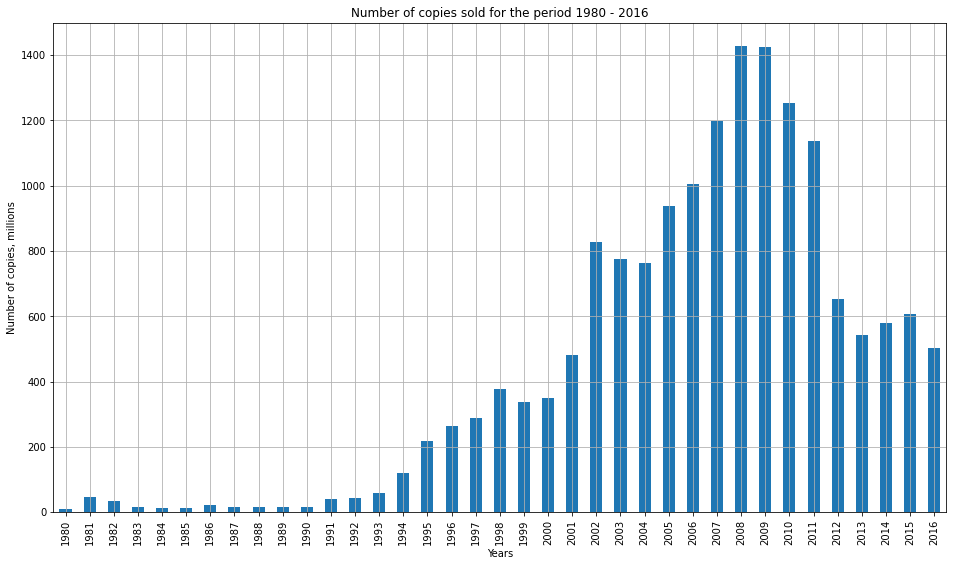

In [26]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', x='year_of_release', grid=True, figsize=(16,9))
plt.title('Number of copies sold for the period 1980 - 2016')
plt.xlabel('Years')
plt.ylabel('Number of copies, millions')
plt.show()

We can see an increase in the number of releases with a peak in 2008, after which the figure dropped. Let's take the period for our analysis from 2002, where there was a sharp increase in sales.

In [27]:
df_since2002 = df.query('year_of_release >= 2002')
len(df_since2002)

13638

#### Sales by platform. Change over the years. Top platforms by years. Average platform lifetime.

Total sales by platform since 2002

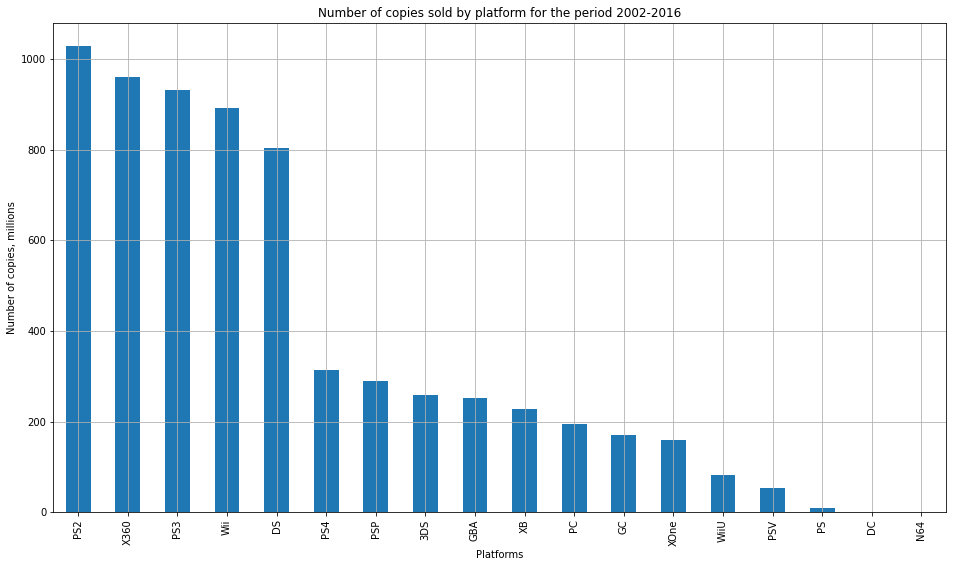

In [28]:
df_since2002.groupby('platform')['world_sales'].sum().sort_values(ascending=False).plot(kind='bar', x='platform', grid=True, figsize=(16,9))
plt.title('Number of copies sold by platform for the period 2002-2016')
plt.xlabel('Platforms')
plt.ylabel('Number of copies, millions')
plt.show()

In terms of total sales, 5 platforms were in the lead. (Perhaps there were other leaders before 2002, but they do not determine our forecast for 2017) Let's look at the numbers.

In [29]:
platforms = df_since2002.groupby('platform')['world_sales'].sum().sort_values(ascending=False).head(5)
platforms

platform
PS2     1027.96
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: world_sales, dtype: float64

The sales for those top 5 platforms over the entire period.

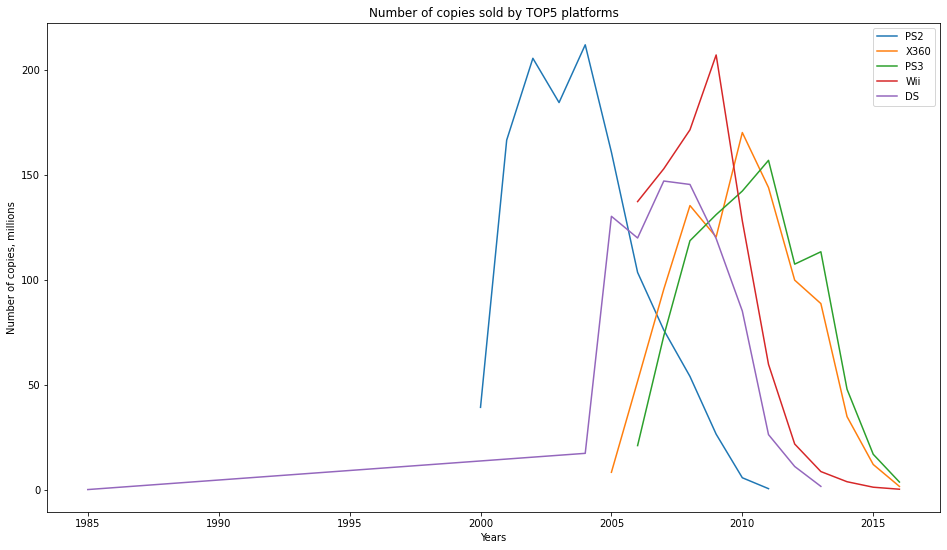

In [30]:
for platform in platforms.index:
    df[df['platform']==platform].groupby('year_of_release')['world_sales'].sum().plot(x='year_of_release', y='world_sales', label=platform, figsize=(16, 9), legend=True)
plt.title('Number of copies sold by TOP5 platforms')
plt.xlabel('Years')
plt.ylabel('Number of copies, millions')
plt.show()

The same visualisation using a pivot table.

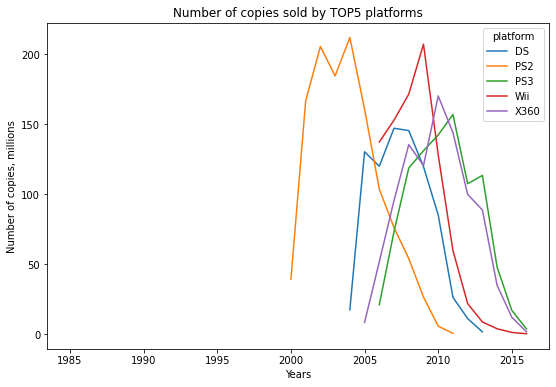

In [31]:
df.query('platform in @platforms.index').pivot_table(index="year_of_release", columns="platform",values="world_sales",aggfunc='sum').plot(figsize=(9, 6))
plt.title('Number of copies sold by TOP5 platforms')
plt.xlabel('Years')
plt.ylabel('Number of copies, millions')
plt.show()

Alternative:

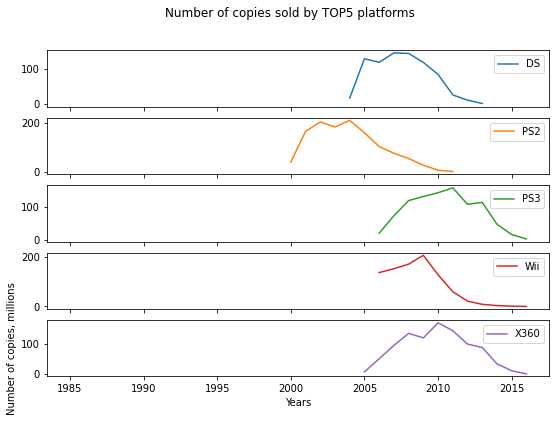

In [32]:
df.query('platform in @platforms.index')\
.pivot_table(
    index="year_of_release", 
    columns="platform",
    values="world_sales",
    aggfunc='sum'
).plot(figsize=(9, 6), subplots=True, title='Number of copies sold by TOP5 platforms')
plt.xlabel('Years')
plt.ylabel('Number of copies, millions')
plt.show()

In [33]:
df.query('platform in @platforms.index').pivot_table(index="year_of_release", columns="platform", values="world_sales", aggfunc='sum')


platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


The popularity of top platforms has a typical pattern: almost symmetrical rapid growth and fall. The average life expectancy is about 10 years. Let's define the exact value and check the sales on the DS platform in 1985 as it looks like an error.

In [34]:
df.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Let's remove that row from the dataset so that it does not spoil the average life of the platform.

In [35]:
df = df[~((df['platform']=='DS')&(df['year_of_release']==1985))]
len(df)

16443

In [36]:
popular_platform_lifespan = df.query('platform in @platforms.index').groupby('platform')['year_of_release'].agg(['max','min'])
popular_platform_lifespan['lifespan'] = popular_platform_lifespan['max'] - popular_platform_lifespan['min']
popular_platform_lifespan['lifespan'].describe()

count     5.00000
mean     10.20000
std       0.83666
min       9.00000
25%      10.00000
50%      10.00000
75%      11.00000
max      11.00000
Name: lifespan, dtype: float64

Let's compare with the average lifetime of all platforms

In [37]:
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['max','min'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
platform_lifespan['lifespan'].describe()

count    31.000000
mean      7.000000
std       5.899152
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: lifespan, dtype: float64

Lifespan of popular platforms 10.2 +/- 0.8, all platforms 7.0 +/- 5.9 years

We need to look for new platforms that are growing in popularity and popular platforms with a lifetime less than 5 years (half of 10 years), i.e. with the start of sales after 2016 - 5 = 2011.

#### Create a slice for the current period

Let's take data from 2011

In [38]:
df_since2011 = df.query('year_of_release >= 2011')
len(df_since2011)

4022

#### Leading platforms. Sales dynamics. Target platforms.

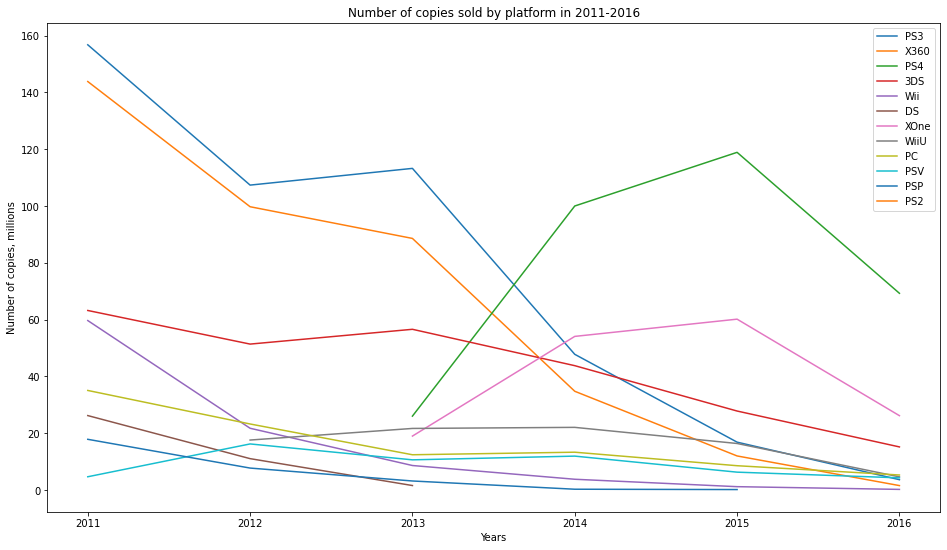

In [39]:
for platform in df_since2011['platform'].unique():
    df_since2011[df_since2011['platform']==platform].groupby('year_of_release')['world_sales'].sum().plot(x='year_of_release', y='world_sales', label=platform, figsize=(16, 9), legend=True)
plt.title('Number of copies sold by platform in 2011-2016')
plt.xlabel('Years')
plt.ylabel('Number of copies, millions')
plt.show()

In [40]:
target_platforms = df_since2011[df['year_of_release']==2016].groupby('platform')['world_sales'].sum().sort_values(ascending=False).head(3)
target_platforms

<ipython-input-40-6aa65a74784f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_platforms = df_since2011[df['year_of_release']==2016].groupby('platform')['world_sales'].sum().sort_values(ascending=False).head(3)


platform
PS4     69.25
XOne    26.15
3DS     15.14
Name: world_sales, dtype: float64

In 2016, sales fell across all platforms. The target platforms for 2017 can be those with the highest sales in 2016: PS4, XOne, 3DS.

####  Sales by platform boxplot

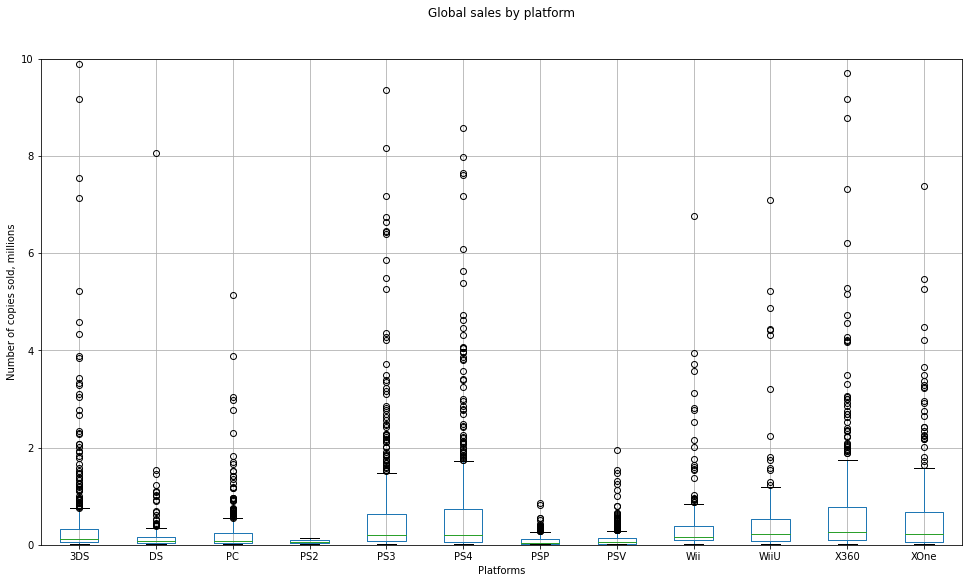

In [41]:
df_since2011.boxplot(column=['world_sales'], by=['platform'], figsize=(16, 9))
plt.suptitle('Global sales by platform')
plt.title(None)
plt.ylim(0,10)
plt.xlabel('Platforms')
plt.ylabel('Number of copies sold, millions')
plt.show()

In [42]:
df_since2011.groupby('platform')['world_sales'].agg(['count','sum','mean','std','median']).sort_values('mean', ascending=False)

,count,sum,mean,std,median
platform,,,,,
PS4,392,314.14,0.801378,1.609456,0.20
X360,498,380.38,0.763815,1.637090,0.27
XOne,247,159.32,0.645020,1.036139,0.22
PS3,708,445.57,0.629336,1.451388,0.21
WiiU,147,82.19,0.559116,1.058836,0.22
3DS,512,257.81,0.503535,1.441271,0.12
Wii,197,95.02,0.482335,1.059069,0.17
PC,389,97.68,0.251105,0.505710,0.08
DS,184,38.73,0.210489,0.636579,0.08


Result: the average number of copies sold is determined by the outliers, i.e. very popular games. Without them, sales on all platforms are more or less the same, while measured by median or quartiles.
<br>
Previously, we identified three target platforms with the highest sales in 2016 (PS4, XOne, 3DS). Let's compare with the average sales by platform (table above)
PS4 - in first place - OK
XOne - in third place - OK
3DS - in 6th place - OK
The second and the fourth places are occupied by X360 and PS3 respectively. Both platforms fell in popularity by 2016, so we do not need them in 2017.
In fifth place is WiiU, however, the sales are low (147). There are few games for this platform, but the mean and the median are high. So, we will mention that platform in the conclusion as a possible target platform. We can assume that there will be few games for it, but sales per game will be high.

#### How user and critic ratings affect sales within a single platform.

A correlation matrix and scatterplot for PS4

In [43]:
df_since2011.query('platform == "PS4"')[['critic_score','user_score','world_sales']].corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
world_sales,0.406568,-0.031957,1.000000


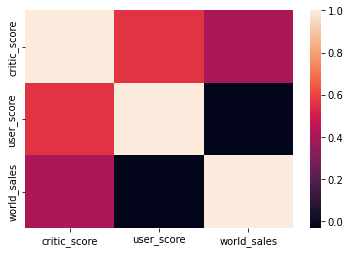

In [44]:
sns.heatmap(df_since2011.query('platform == "PS4"')[['critic_score','user_score','world_sales']].corr());

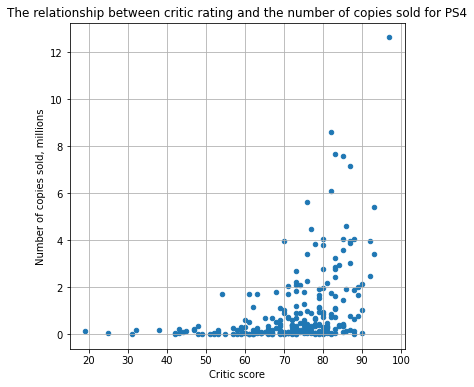

In [45]:
df_since2011.query('platform == "PS4"').plot(kind='scatter', x='critic_score', y='world_sales', grid=True, figsize=(6,6))
plt.title("The relationship between critic rating and the number of copies sold for PS4")
plt.xlabel("Critic score")
plt.ylabel('Number of copies sold, millions')
plt.show()

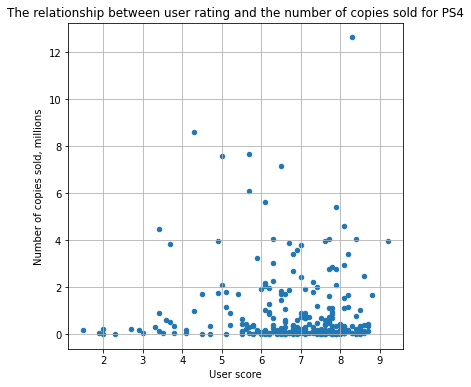

In [46]:
df_since2011.query('platform == "PS4"').plot(kind='scatter', x='user_score', y='world_sales', grid=True, figsize=(6,6))
plt.title("The relationship between user rating and the number of copies sold for PS4")
plt.xlabel("User score")
plt.ylabel('Number of copies sold, millions')
plt.show()

<b>Results</b>
There is a weak positive correlation (0.4) between critic rating and sales. The correlation between user rating and sales is negligible (-0.03). However, there is a moderate positive correlation between ratings from critics and users, so their opinions seem to coincide. Visually, the relationship between the critic score and sales, if it exists, is non-linear (more like an exponential one). The relationship between the user score and sales is not visible on the graph.

#### Influence of users' and critics' scores on sales within other platforms.

Let's check the relationship between the ratings and sales for XOne, 3DS, WiiU. Correlations:

In [47]:
df_since2011.query('platform == "XOne"')[['critic_score','user_score','world_sales']].corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
world_sales,0.416998,-0.068925,1.000000


In [48]:
df_since2011.query('platform == "3DS"')[['critic_score','user_score','world_sales']].corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.745222,0.348740
user_score,0.745222,1.000000,0.222078
world_sales,0.348740,0.222078,1.000000


In [49]:
df_since2011.query('platform == "WiiU"')[['critic_score','user_score','world_sales']].corr()

,critic_score,user_score,world_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
world_sales,0.34838,0.400219,1.000000


Plots:

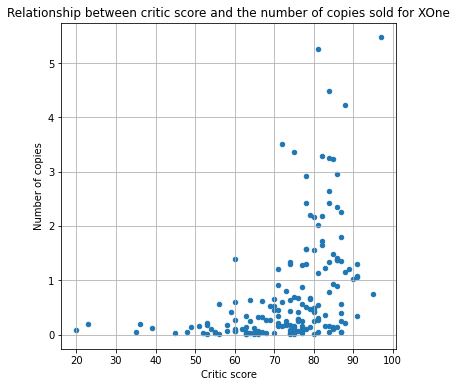

In [50]:
df_since2011.query('platform == "XOne"').plot(kind='scatter', x='critic_score', y='world_sales', grid=True, figsize=(6,6))
plt.title("Relationship between critic score and the number of copies sold for XOne")
plt.xlabel("Critic score")
plt.ylabel('Number of copies')
plt.show()

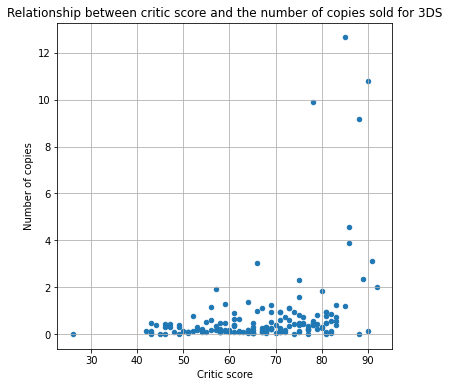

In [51]:
df_since2011.query('platform == "3DS"').plot(kind='scatter', x='critic_score', y='world_sales', grid=True, figsize=(6,6))
plt.title("Relationship between critic score and the number of copies sold for 3DS")
plt.xlabel("Critic score")
plt.ylabel('Number of copies')
plt.show()

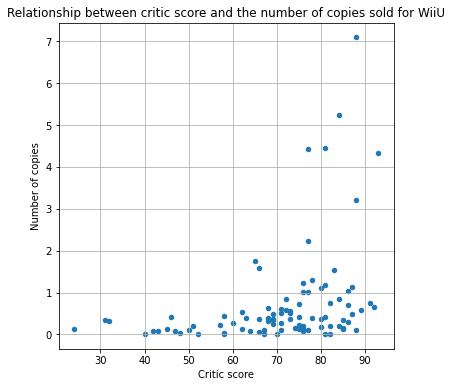

In [52]:
df_since2011.query('platform == "WiiU"').plot(kind='scatter', x='critic_score', y='world_sales', grid=True, figsize=(6,6))
plt.title("Relationship between critic score and the number of copies sold for WiiU")
plt.xlabel("Critic score")
plt.ylabel('Number of copies')
plt.show()

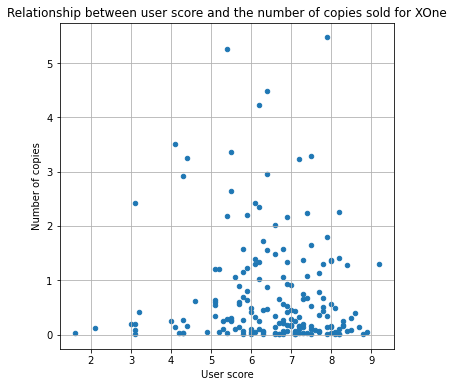

In [53]:
df_since2011.query('platform == "XOne"').plot(kind='scatter', x='user_score', y='world_sales', grid=True, figsize=(6,6))
plt.title("Relationship between user score and the number of copies sold for XOne")
plt.xlabel("User score")
plt.ylabel('Number of copies')
plt.show()

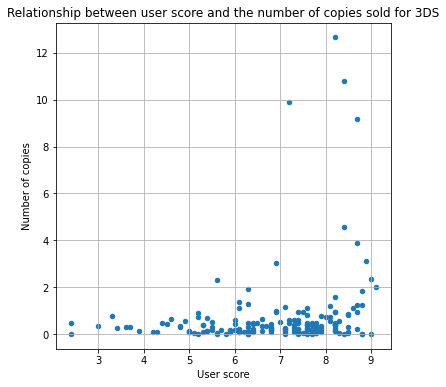

In [54]:
df_since2011.query('platform == "3DS"').plot(kind='scatter', x='user_score', y='world_sales', grid=True, figsize=(6,6))
plt.title("Relationship between user score and the number of copies sold for 3DS")
plt.xlabel("User score")
plt.ylabel('Number of copies')
plt.show()

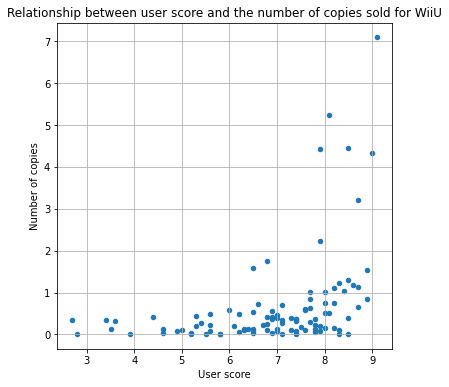

In [55]:
df_since2011.query('platform == "WiiU"').plot(kind='scatter', x='user_score', y='world_sales', grid=True, figsize=(6,6))
plt.title("Relationship between user score and the number of copies sold for WiiU")
plt.xlabel("User score")
plt.ylabel('Number of copies')
plt.show()

<b>Results:</b>
XOne and PS4 have similar correlations: a weak positive (0.4) between critic score and sales; negligible between user score and sales. The 3DS and WiiU have a weaker correlation between critic rating and sales (0.35). However, the correlation between user rating and sales is higher: 3DS - 0.22, WiiU - 0.44. The relationships are exponential rather than linear, only high rating increases sales.
Thus, for all platforms, the dependence of sales on ratings is slightly different. In general, critic rating is more important for PS4, XOne, 3DS, while for WiiU user rating makes the difference.

####  Distribution of games by genres. The most profitable genres. Genres with high and low sales

In [56]:
df_since2011.groupby('genre')['world_sales'].agg(['count','sum','mean', 'std','median']).sort_values('sum', ascending=False)

,count,sum,mean,std,median
genre,,,,,
Action,1269,557.80,0.439559,1.122831,0.130
Shooter,329,402.91,1.224650,2.269889,0.410
Role-Playing,465,245.63,0.528237,1.300689,0.150
Sports,389,237.15,0.609640,1.075213,0.200
Misc,375,139.42,0.371787,0.959781,0.130
Platform,122,88.68,0.726885,1.513836,0.185
Racing,180,88.31,0.490611,1.212137,0.160
Fighting,159,66.90,0.420755,0.814960,0.180
Simulation,136,50.26,0.369559,1.018242,0.110


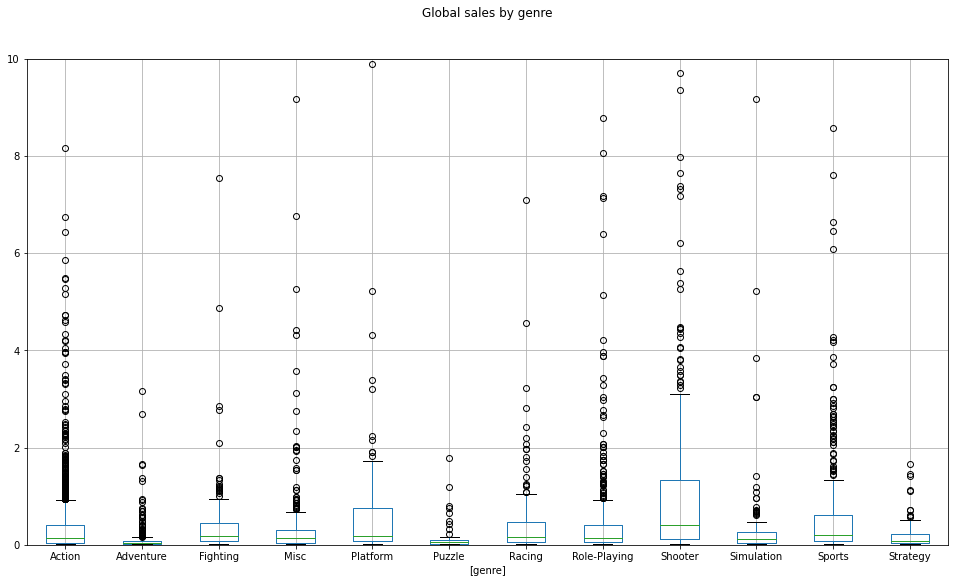

In [57]:
df_since2011.boxplot(column=['world_sales'], by=['genre'], figsize=(16, 9))
plt.suptitle('Global sales by genre')
plt.title(None)
plt.ylim(0,10)
plt.show()

In total, Action has more sales (by a wide margin), followed by Shooters, Role-playing, Sports, Misc.
<br>Minimum sales: Strategy, Puzzle
<br>In terms of the average number of copies sold, Shooters, Platform, Sports are in the lead, while Puzzle and Adventure have the minimum sales. However, the medians do not differ much, i.e. the success of the genre is determined by outliers (single super-successful games), except for Shooters, where both the median is high and a large number of games fit within one quartile of the median.
<br>Conclusion: target genres for which we expect high sales: Shooters (lowest risk of failure), Platform, Sports. In addition, we expect that Action games will be released many times more than others, and some of them will be very successful in terms of sales. Also, due to the large sales, we will add to the target ones: Role-playing, Misc.

### A typical user for each region

#### Most popular platforms (top 5)

In [58]:
report_na = df_since2011.groupby('platform').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False)
report_na['share'] = report_na['na_sales'] / report_na['na_sales'].sum()
report_na.head()

,na_sales,share
platform,,
X360,226.80,0.273332
PS3,168.26,0.202782
PS4,108.74,0.131050
XOne,93.12,0.112225
3DS,82.65,0.099607


In [59]:
report_eu = df_since2011.groupby('platform').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False)
report_eu['share'] = report_eu['eu_sales'] / report_eu['eu_sales'].sum()
report_eu.head()

,eu_sales,share
platform,,
PS3,163.10,0.243509
PS4,141.09,0.210648
X360,117.10,0.174831
3DS,61.27,0.091476
PC,56.70,0.084653


In [60]:
report_jp = df_since2011.groupby('platform').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False)
report_jp['share'] = report_jp['jp_sales'] / report_jp['jp_sales'].sum()
report_jp.head()

,jp_sales,share
platform,,
3DS,100.62,0.409607
PS3,49.39,0.201058
PSP,24.04,0.097863
PSV,21.84,0.088907
PS4,15.96,0.064970


There are differences in platforms between regions:
<br>In North America: X360 and PS3, which are no longer relevant for 2017, are popular. The remaining 3 platforms (PS4, XOne, 3DS) have been already our target.
<br>In Europe, there is a similar top:  X360 and PS3 (outdated for 2017) and PS4 and 3DC. There is PC in fifth place, but its share is small (8.5%)
<br>In Japan, everything is different. 3DC and  PS4 are our target platforms. PS3 and PSP are not relevant. Furthermore, PSV accounts for 8.8%.
<br>Conclusion: region segmentation:
- in North America  - common target platforms
- In Europe  - common target platforms + PC
- In Japan - common target platforms + PSV

#### Most popular genres (top 5)

In [61]:
report_na = df_since2011.groupby('genre').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False)
report_na['share'] = report_na['na_sales'] / report_na['na_sales'].sum()
report_na.head()

,na_sales,share
genre,,
Action,230.92,0.278297
Shooter,194.43,0.234321
Sports,108.70,0.131002
Role-Playing,83.78,0.100969
Misc,69.69,0.083988


In [62]:
report_eu = df_since2011.groupby('genre').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False)
report_eu['share'] = report_eu['eu_sales'] / report_eu['eu_sales'].sum()
report_eu.head()

,eu_sales,share
genre,,
Action,199.12,0.297287
Shooter,148.02,0.220995
Sports,88.48,0.132101
Role-Playing,62.30,0.093014
Racing,40.58,0.060586


In [63]:
report_jp = df_since2011.groupby('genre').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False)
report_jp['share'] = report_jp['jp_sales'] / report_jp['jp_sales'].sum()
report_jp.head()

,jp_sales,share
genre,,
Role-Playing,79.87,0.325137
Action,63.62,0.258986
Misc,17.60,0.071647
Fighting,12.38,0.050397
Platform,12.13,0.049379


The top genres in North America and Europe are almost the same: Action, Shooters, Sports, Role-Playing. In fifth place, there are Misc and Racing in NA and EU, respectively. In Japan, in addition to Role-Playing, Action, Misc, there are also Fighting, Platform.
Target genres by region:
North America: Shooters, Sports, Action, Role-playing, Misc (everything is already in the target genres)
Europe: Shooters, Sports, Action, Role-playing and Racing
Japan: Action, Role-playing, Misc and Fighting, Platform.

#### The impact of the ESRB rating on sales in the region

In [64]:
report_na = df_since2011.groupby('rating').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False)
report_na['share'] = report_na['na_sales'] / report_na['na_sales'].sum()
report_na.head()

,na_sales,share
rating,,
M,308.45,0.436855
E,170.17,0.241010
E10+,117.72,0.166726
T,109.31,0.154815
EC,0.42,0.000595


In [65]:
report_eu = df_since2011.groupby('rating').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False)
report_eu['share'] = report_eu['eu_sales'] / report_eu['eu_sales'].sum()
report_eu.head()

,eu_sales,share
rating,,
M,250.26,0.452402
E,141.73,0.256210
T,83.16,0.150331
E10+,78.00,0.141003
RP,0.03,0.000054


In [66]:
report_jp = df_since2011.groupby('rating').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False)
report_jp['share'] = report_jp['jp_sales'] / report_jp['jp_sales'].sum()
report_jp.head()

,jp_sales,share
rating,,
E,36.68,0.341400
T,33.39,0.310778
M,26.14,0.243299
E10+,11.23,0.104523
EC,0.00,0.000000


ESRB rating targets for all regions are M, E, T, E10+

### Testing hypotheses

#### The average user ratings on the Xbox One and PC platforms are the same

Let's create two samples with user_score for XOne and PC. Because there are some missing values in user_score, we will remove those rows (as the t-test does not work with them). Null hypothesis: The average user ratings of the Xbox One and PC platforms are equal. Alternative hypothesis: the average user ratings are not equal.

In [67]:
sample_xone = df_since2011.query('user_score == user_score and platform == "XOne"')['user_score']
sample_pc = df_since2011.query('user_score == user_score and platform == "PC"')['user_score']

Let's look at the descriptive statistics of these samples

In [68]:
sample_xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [69]:
sample_pc.describe()

count    307.000000
mean       6.451792
std        1.611303
min        1.400000
25%        5.550000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

The difference between the means is less than the standard deviations. Hence, it is unlikely, that a statistical test will show the difference. Let's look at the distribution in the histogram.

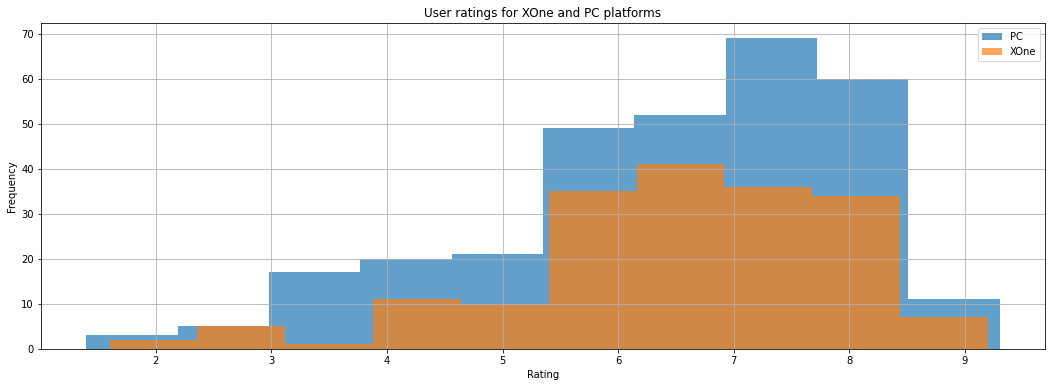

In [70]:
plt.figure(figsize=(18, 6))
plt.title("User ratings for XOne and PC platforms")
plt.grid(True)
plt.hist(sample_pc, label = 'PC', bins=10, alpha=0.7)
plt.hist(sample_xone, label = 'XOne', bins=10, alpha=0.7)
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the ratings should be almost the same.

We will use Student's test with the significance level set equal to 0.05. Null hypothesis: the means are equal. Alternative hypothesis: the means are not equal.

In [71]:
alpha = 0.05

Let's use Levene's test to see whether the variances differ or not (to set the equal_var parameter).

In [72]:
from scipy.stats import levene

In [73]:
stat, p = levene(sample_xone,sample_pc)
print('p-value:', p)
if p < alpha:
    print("We reject the null hypothesis - the sample variances are different")
else:
    print("We do not reject the null hypothesis - the sample variances are the same")

p-value: 0.019238606822499546
We reject the null hypothesis - the sample variances are different


Student's test with equal_var=False

In [74]:
alpha = 0.05

results = st.ttest_ind(sample_xone, sample_pc, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-value: 0.6130712247638477
We do not reject the null hypothesis


There is no statistically significant difference, therefore the ratings do not differ.

#### Average user ratings for the Action and Sports genres are different

Let's create two samples with user_score for Action and Sports. As there are a few missing values in user_score, we will remove these rows.

In [75]:
sample_action = df_since2011.query('user_score == user_score and genre == "Action"')['user_score']
sample_sports = df_since2011.query('user_score == user_score and genre == "Sports"')['user_score']

Let's look at the descriptive statistics of these samples

In [76]:
sample_action.describe()

count    664.000000
mean       6.775904
std        1.346060
min        1.600000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [77]:
sample_sports.describe()

count    246.000000
mean       5.650813
std        1.697795
min        0.200000
25%        4.400000
50%        6.000000
75%        6.900000
max        8.800000
Name: user_score, dtype: float64

The means are different. Let's look at the distribution in the histogram.

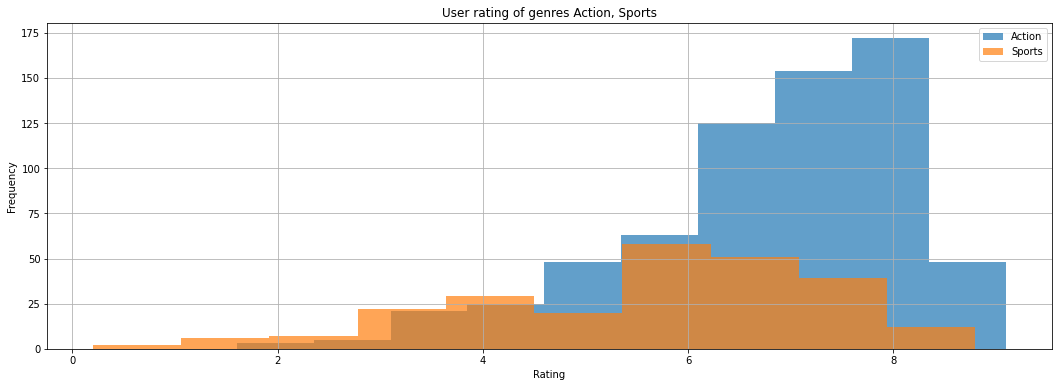

In [78]:
plt.figure(figsize=(18, 6))
plt.title("User rating of genres Action, Sports")
plt.grid(True)
plt.hist(sample_action, label = 'Action', bins=10, alpha=0.7)
plt.hist(sample_sports, label = 'Sports', bins=10, alpha=0.7)
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the ratings differ significantly.

We will use the Student's test, the significance level is the same (0.05). Null hypothesis: the means are equal. Alternative hypothesis: the means are not equal.

We will also do Levene's test to detect whether the variances differ or not (to set the equal_var parameter).

In [79]:
stat, p = levene(sample_action, sample_sports)
print('p-value:', p)
if p < alpha:
    print("We reject the null hypothesis - the sample variances are different")
else:
    print("We do not reject the null hypothesis - the sample variances are the same")

p-value: 1.9840382117903915e-05
We reject the null hypothesis - the sample variances are different


Student's test with equal_var=False. Null hypothesis: the average user ratings of the Action and Sports genres are equal. Alternative hypothesis: the means are not equal.

In [80]:
results = st.ttest_ind(sample_action, sample_sports, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-value: 8.285648549432565e-19
We reject the null hypothesis


There is a statistically significant difference. Hence the ratings are different.

### Conclusion


For 2017 planning, we should consider the following segments:
- prospective platforms: PS4, XOne, 3DS, since we expect the largest sales on them. In addition, we can include the WiiU platform. Although the overall sales on it are not so large due to the relatively small number of games, each game brings on average more sales than on the 3DS platform.
- the target genres: Shooters (the most stable genre with the largest sales), Platform, Sports, as these genres have high average sales. In addition, Action, Role-playing and Misc could be also prospective,  because of the large number of games. However, high sales are provided by a few super-successful games.
<br>
We should also take into account ratings of games:
- Critic rating is important for games on PS4, XOne, 3DS. However, only very high scores boost sales.
- User rating is important for games on the WiiU platform. However, only a very high rating increases sales.
<br>

Sales in different regions:
- In North America, we should promote all our target platforms and genres.
- In Europe, PC could be added to the list of target platforms. In terms of genres, we can add Racing.
- In Japan, we can add PSV as a target platform and Fighting and Platform as a target genre.

In terms of ESRB rating, the target values are M, E, T, E10+.